In [26]:


# stock prediction web app using LSTM model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [32]:
beginning = '2015-01-01'
ending = '2022-12-31'

# using AAPL to start/train model, then generalizing
# it later
data = yf.download('AAPL', start=beginning, end=ending)

dataframe = pd.DataFrame(data)

dataframe.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565697,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873638,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875885,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210684,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140915,237458000


In [33]:
dataframe.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,77034200


In [31]:
df = dataframe.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565697,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875887,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210688,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140915,237458000


In [34]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


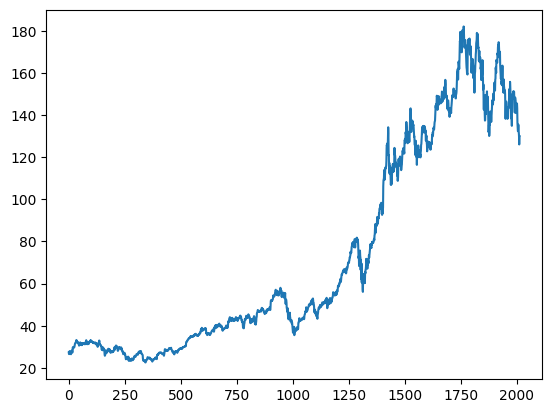

In [35]:
plt.plot(df.Close)

In [36]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2009,130.919998,132.419998,129.639999,131.860001,63814900
2010,131.380005,131.410004,128.720001,130.029999,69007800
2011,129.669998,131.029999,125.870003,126.040001,85438400
2012,127.989998,130.479996,127.730003,129.610001,75703700


In [39]:
# moving average = mean of previous 100 closing values
movav100 = df.Close.rolling(100).mean()
movav100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2009    150.515600
2010    150.157800
2011    149.764699
2012    149.412100
2013    149.062199
Name: Close, Length: 2014, dtype: float64

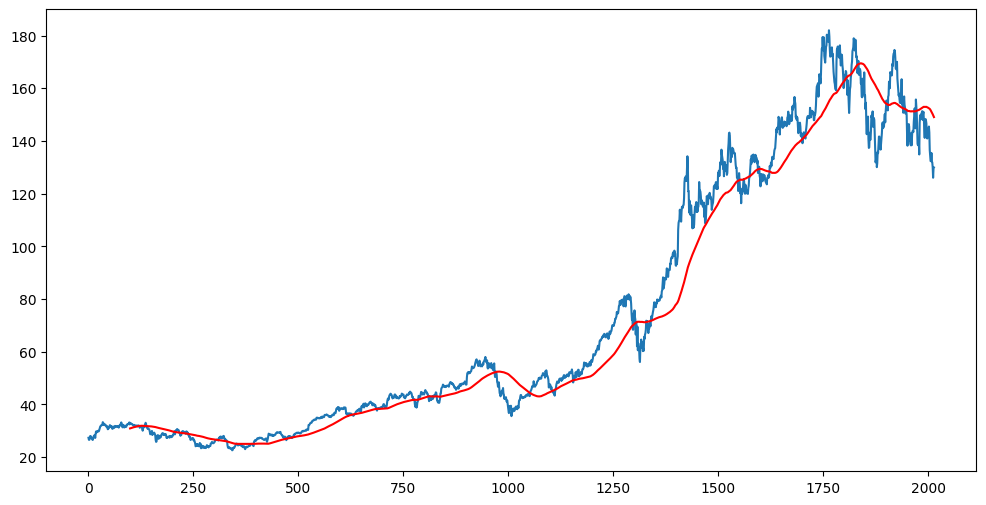

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(movav100, 'r')

In [42]:
movav200 = df.Close.rolling(200).mean()
movav200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2009    152.1331
2010    152.0096
2011    151.8867
2012    151.7593
2013    151.6110
Name: Close, Length: 2014, dtype: float64

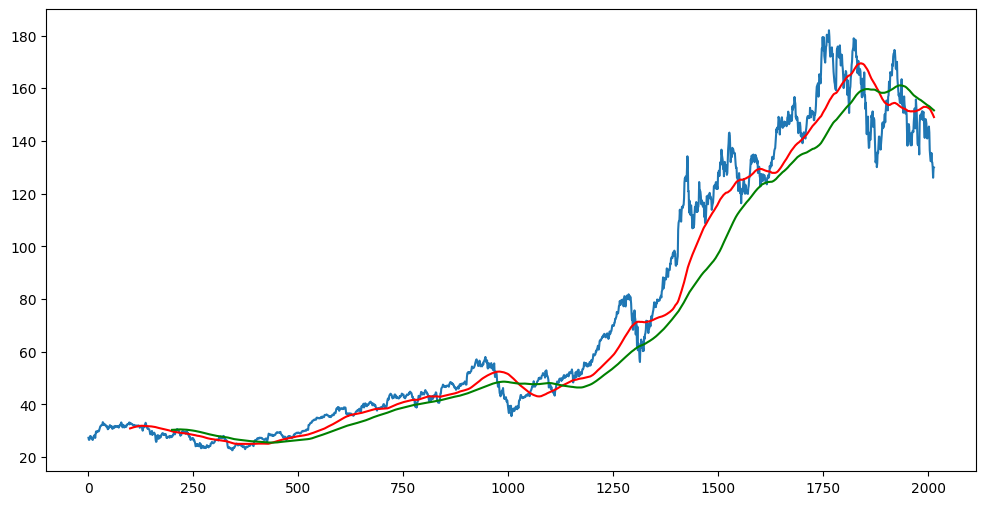

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(movav100, 'r')
plt.plot(movav200, 'g')

In [44]:
df.shape

(2014, 5)

In [45]:
# split data to train/test

train_split = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_split = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(train_split.shape)
print(test_split.shape)

(1409, 1)
(605, 1)


In [48]:
train_split.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [47]:
test_split.head()

,Close
1409,111.112503
1410,112.727501
1411,109.375000
1412,113.010002
1413,115.010002


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [50]:
train_array = scaler.fit_transform(train_split)
train_array

array([[0.05198896],
       [0.04355683],
       [0.04358422],
       ...,
       [0.95359602],
       [0.95794895],
       [1.        ]])

In [51]:
train_array.shape

(1409, 1)

In [53]:
xtrain = []
ytrain = []

for i in range(100, train_array.shape[0]):
    xtrain.append(train_array[i-100:i])
    ytrain.append(train_array[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain

array([[[0.05198896],
        [0.04355683],
        [0.04358422],
        ...,
        [0.11553097],
        [0.10753689],
        [0.11416212]],

       [[0.04355683],
        [0.04358422],
        [0.04766338],
        ...,
        [0.10753689],
        [0.11416212],
        [0.11345033]],

       [[0.04358422],
        [0.04766338],
        [0.05899746],
        ...,
        [0.11416212],
        [0.11345033],
        [0.10934378]],

       ...,

       [[0.4322556 ],
        [0.51367484],
        [0.41577467],
        ...,
        [0.80603395],
        [0.91630855],
        [0.9456293 ]],

       [[0.51367484],
        [0.41577467],
        [0.44493117],
        ...,
        [0.91630855],
        [0.9456293 ],
        [0.95359602]],

       [[0.41577467],
        [0.44493117],
        [0.4279848 ],
        ...,
        [0.9456293 ],
        [0.95359602],
        [0.95794895]]])

In [54]:
xtrain.shape

(1309, 100, 1)

In [57]:
# building the machine learning model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2023-05-11 10:54:49.461862: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [58]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (xtrain.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [60]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
41/41 [==============================] - 46s 557ms/step - loss: 0.0049
Epoch 2/10
41/41 [==============================] - 21s 521ms/step - loss: 0.0038
Epoch 3/10
41/41 [==============================] - 18s 435ms/step - loss: 0.0031
Epoch 4/10
41/41 [==============================] - 17s 425ms/step - loss: 0.0027
Epoch 5/10
41/41 [==============================] - 17s 426ms/step - loss: 0.0027
Epoch 6/10
41/41 [==============================] - 17s 411ms/step - loss: 0.0036
Epoch 7/10
41/41 [==============================] - 18s 438ms/step - loss: 0.0034
Epoch 8/10
41/41 [==============================] - 20s 490ms/step - loss: 0.0027
Epoch 9/10
41/41 [==============================] - 18s 446ms/step - loss: 0.0033
Epoch 10/10
41/41 [==============================] - 16s 398ms/step - loss: 0.0028


In [61]:
model.save('keras_model.h5')

In [63]:
test_split.head()

,Close
1409,111.112503
1410,112.727501
1411,109.375000
1412,113.010002
1413,115.010002


In [64]:
train_split.tail(100)

,Close
1309,63.215000
1310,61.667500
1311,61.195000
1312,57.310001
1313,56.092499
...,...
1404,106.260002
1405,108.937500
1406,109.665001
1407,110.062500


In [67]:
last100 = train_split.tail(100)
print(type(last100))
print(type(test_split))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [69]:
df_updated = pd.concat([last100, test_split], ignore_index=True)
df_updated.head()

,Close
0,63.215000
1,61.667500
2,61.195000
3,57.310001
4,56.092499


In [71]:
input = scaler.fit_transform(df_updated)
input

array([[0.05656483],
       [0.04427503],
       [0.04052257],
       [0.00966905],
       [0.        ],
       [0.04469198],
       [0.0419918 ],
       [0.06764351],
       [0.04639945],
       [0.0604364 ],
       [0.05940397],
       [0.03283898],
       [0.04082037],
       [0.03383169],
       [0.07564478],
       [0.06960907],
       [0.08279233],
       [0.08660432],
       [0.09704768],
       [0.12444655],
       [0.11924474],
       [0.12373183],
       [0.11600849],
       [0.10435404],
       [0.08735879],
       [0.10270616],
       [0.10058174],
       [0.11634604],
       [0.11674315],
       [0.10762998],
       [0.12579669],
       [0.13784818],
       [0.12845715],
       [0.13657754],
       [0.14531341],
       [0.15140868],
       [0.15758333],
       [0.17027024],
       [0.17995914],
       [0.17281159],
       [0.16534636],
       [0.16909885],
       [0.16546548],
       [0.17985983],
       [0.1762464 ],
       [0.18833764],
       [0.18361231],
       [0.187

In [72]:
input.shape

(705, 1)

In [75]:
xtest = []
ytest = []

for i in range (100, input.shape[0]):
    xtest.append(input[i-100:i])
    ytest.append(input[i,0])

In [76]:
xtest, ytest = np.array(xtest), np.array(ytest)
print(xtest.shape)
print(ytest.shape)

(605, 100, 1)
(605,)


In [77]:
# time to predict stuff
y_predict = model.predict(xtest)

19/19 [==============================] - 5s 129ms/step


In [78]:
y_predict.shape

(605, 1)

In [79]:
ytest

array([0.43695282, 0.44977866, 0.42315407, 0.4520222 , 0.46790562,
       0.46709158, 0.46470905, 0.47229339, 0.47344491, 0.49383529,
       0.54224001, 0.55405326, 0.54585344, 0.55933451, 0.5473227 ,
       0.54571451, 0.57932771, 0.62014809, 0.59807015, 0.5145234 ,
       0.51515875, 0.45051326, 0.48625094, 0.45583419, 0.44400106,
       0.4706852 , 0.47211471, 0.44503346, 0.43081779, 0.40302181,
       0.42875299, 0.44249211, 0.40524554, 0.41398141, 0.44622473,
       0.46750851, 0.4605992 , 0.47425895, 0.48204185, 0.45210157,
       0.47973874, 0.45321347, 0.46846153, 0.46758794, 0.48347136,
       0.54247825, 0.51627059, 0.51698537, 0.51317333, 0.49975182,
       0.47560908, 0.48775989, 0.4826772 , 0.47378246, 0.46814386,
       0.46822329, 0.4805329 , 0.43764767, 0.47036753, 0.4190641 ,
       0.41834931, 0.43161201, 0.46742907, 0.49983126, 0.4971311 ,
       0.47830923, 0.47552965, 0.50348443, 0.50126077, 0.50165788,
       0.50991726, 0.50269028, 0.49188955, 0.49673399, 0.48640

In [80]:
y_predict

array([[0.31622842],
       [0.3233633 ],
       [0.33190072],
       [0.3413362 ],
       [0.35127008],
       [0.36142838],
       [0.37157536],
       [0.3814811 ],
       [0.39097583],
       [0.39992714],
       [0.40833932],
       [0.41649777],
       [0.42473483],
       [0.43322837],
       [0.44208366],
       [0.45120317],
       [0.46037138],
       [0.46952492],
       [0.47883165],
       [0.48829842],
       [0.49732667],
       [0.5052754 ],
       [0.5113018 ],
       [0.515038  ],
       [0.51628083],
       [0.5150127 ],
       [0.5115722 ],
       [0.50648904],
       [0.5001617 ],
       [0.49289584],
       [0.48484045],
       [0.47627443],
       [0.4675809 ],
       [0.45894545],
       [0.4505391 ],
       [0.44267428],
       [0.4357521 ],
       [0.4300543 ],
       [0.42579293],
       [0.42309612],
       [0.42179835],
       [0.4217617 ],
       [0.42267466],
       [0.42428452],
       [0.42635638],
       [0.4287697 ],
       [0.4317569 ],
       [0.435

In [81]:
scaler.scale_

array([0.00794171])

In [82]:
scalefactor = 1/0.00794171
y_predict = y_predict * scalefactor
ytest = ytest*scalefactor

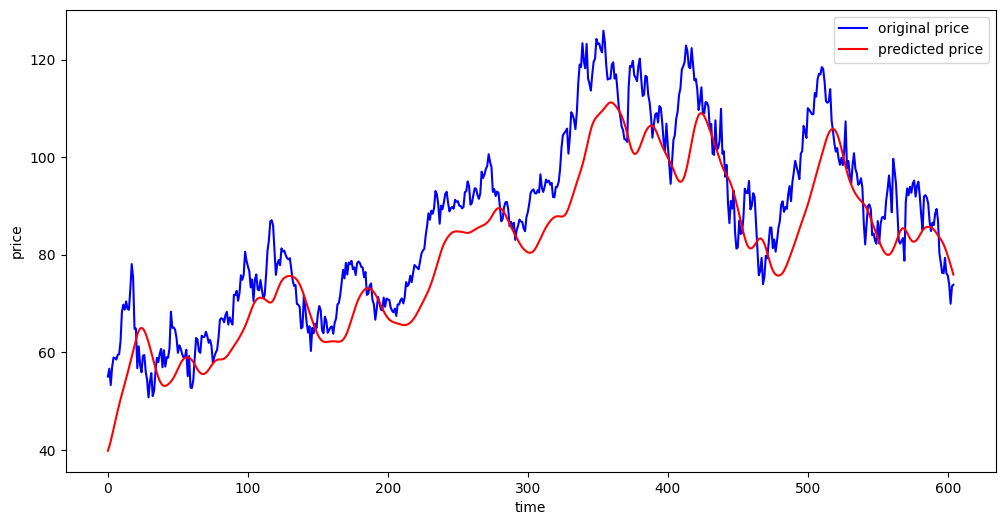

In [84]:
plt.figure(figsize=(12,6))
plt.plot(ytest,'b',label = 'original price')
plt.plot(y_predict,'r', label = 'predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
# testing


last100 = train_split.tail(100)
df_updated = pd.concat([last100, test_split], ignore_index=True)
input = scaler.fit_transform(df_updated)

xtest = []
ytest = []

for i in range (100, input.shape[0]):
    xtest.append(input[i-100:i])
    ytest.append(input[i,0])

xtest, ytest = np.array(xtest), np.array(ytest)
y_predict = model.predict(xtest)

scalefactor = 1/scaler.scale_
y_predict = y_predict * scalefactor
ytest = ytest*scalefactor


# final graph

st.subheader('Predictions vs. Original')
fig2 = plt.figure(figsize=(12,6))
plt.plot(ytest,'b',label = 'original price')
plt.plot(y_predict,'r', label = 'predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()
st.pyplot(fig2)